In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [ ]:
print(f"TensorFlow Version: {tf.__version__}")

# Tahap 2: Load dan Pra-pemrosesan Data
!wget https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz -O cifar-10-binary.tar.gz
!tar -xvzf cifar-10-binary.tar.gz

datadir = 'cifar-10-batches-bin/'
G = glob.glob(datadir + '*.bin')
A = np.fromfile(G[0], dtype=np.uint8).reshape([10000, 3073])
labels = A[:, 0]
images = A[:, 1:].reshape([10000, 3, 32, 32]).transpose(0, 2, 3, 1)


TensorFlow Version: 2.17.1
--2024-12-18 09:04:01--  https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170052171 (162M) [application/x-gzip]
Saving to: ‘cifar-10-binary.tar.gz’

cifar-10-binary.tar 100%[===================>] 162.17M  27.4MB/s    in 7.1s    

2024-12-18 09:04:09 (22.7 MB/s) - ‘cifar-10-binary.tar.gz’ saved [170052171/170052171]

cifar-10-batches-bin/
cifar-10-batches-bin/data_batch_1.bin
cifar-10-batches-bin/batches.meta.txt
cifar-10-batches-bin/data_batch_3.bin
cifar-10-batches-bin/data_batch_4.bin
cifar-10-batches-bin/test_batch.bin
cifar-10-batches-bin/readme.html
cifar-10-batches-bin/data_batch_5.bin
cifar-10-batches-bin/data_batch_2.bin


Label: 5


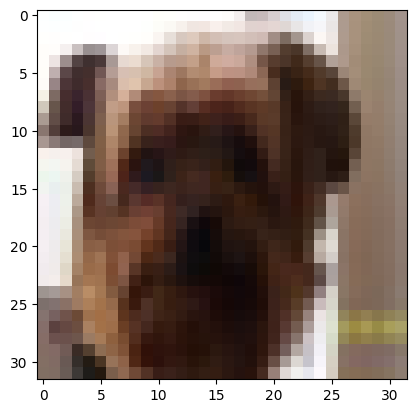

In [ ]:
# Tampilkan sampel data
plt.imshow(images[14])
print("Label:", labels[14])

In [ ]:
# Normalisasi data
images = np.array(images, dtype=np.float32) / 255.0

In [ ]:
# Tahap 3: Definisi Model CNN
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(96, activation='relu'),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Tahap 4: Melatih Model
model.summary()
history = model.fit(images, labels, epochs=10, batch_size=100, verbose=1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 96)                  │          38,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           4,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,274 (200.29 KB)

 Trainable params: 51,274 (200.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.0997 - loss: 2.3019
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.1714 - loss: 2.2312
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.2198 - loss: 2.1129
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.2323 - loss: 2.0823
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.2437 - loss: 2.0551
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.2555 - loss: 2.0211
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.2693 - loss: 2.0088
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.2579 - loss: 1.9921
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.2773 - loss: 1.9762
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.2832 - loss: 1.9374


In [ ]:
predictions = np.argmax(model.predict(images), axis=-1)
test_accuracy = accuracy_score(labels, predictions)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Test Accuracy: 0.2744
